# Conservation plots

In [1]:
%load_ext autoreload
%autoreload 2

# Imports
import itertools

import matplotlib.pyplot as plt
import pandas as pd

from src import constants as C
from src import visualisation as vis
from src.visualisation import phylop_plots

In [2]:
# Module constants
_METRICS = ["phylop", "alpha_mis", "pext"]
_CONSTRAINT = ["constrained", "unconstrained"]
_X_LABELS = ["Mean phyloP","Mean AlphaMissense","Mean pext"]

In [3]:
# Style and palettes
plt.style.use(C.STYLE_DEFAULT)
PALETTE = vis.color_palette("regions")[::-1] # Bars are in reverse order

## Load and clean data

In [4]:
# Read the data
df = pd.read_csv(C.STATS_PHYLOP_MISSENSE_PEXT, sep="\t", index_col="region")

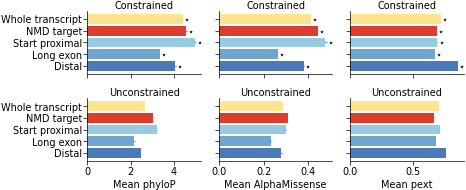

In [5]:
# Instantiate the figure
fig, axs = plt.subplots(
    len(_CONSTRAINT),
    len(_METRICS),
    figsize=(4 * len(_METRICS) * C.CM, 2.5 * len(_CONSTRAINT) * C.CM),
    layout="constrained",
    gridspec_kw={"hspace": 0.1, "wspace": 0.05},
    sharey=True,
    sharex="col",
)
axs = axs.flatten()

# Data subsets
subset_combinations = itertools.product(_CONSTRAINT, _METRICS)

# Plots
for ax, (constraint, metric) in zip(axs, subset_combinations):
    subset = df[(df["constraint"] == constraint) & (df["metric"] == metric)]

    phylop_plots.horizontal_bars(
        subset["mean"],
        ax=ax,
        xerr=subset["ci_95"],
    )

# X axis labels in lowest Axes
for ax, label in zip(axs[-len(_METRICS) :], _X_LABELS):
    ax.set_xlabel(label)

# Constraint annotations
for ax, title in zip(axs, [x.capitalize() for x in sorted(_CONSTRAINT * len(_METRICS))]):
    ax.set_title(title)

# Significance annotations
for ax in axs[:3]:
    bars = ax.containers[1]
    ax.bar_label(bars, labels=[r"$\star$"] * len(bars))
    # for bar in ax.containers[1]:
    #     ax.bar_label(bar, labels="*")    

# Save figure
plt.savefig("data/plots/figures/fig_03.svg")
plt.savefig("data/plots/figures/fig_03.png", dpi = 1000)